In [1]:
import vis
import json
from vis.utils import utils
import keras
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input
from vis.visualization import visualize_saliency
from keras.models import load_model
import pathlib
import numpy as np
% matplotlib inline

Using TensorFlow backend.


In [2]:
# _img = load_img('tiny-imagenet-200/train/n01641577/images/n01641577_10.JPEG')
_img = load_img('tiny-imagenet-200/train/n01768244/images/n01768244_107.JPEG')

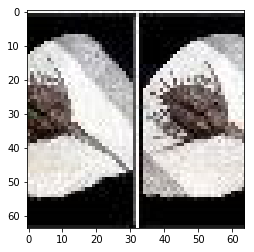

In [3]:
plt.imshow(_img)
plt.show()

In [4]:
model = tf.keras.models.load_model('mobile_net1.h5')

In [5]:
# Create a tensorflow dataset
data_dir = pathlib.Path('./tiny-imagenet-200/train/')
val_data_dir = pathlib.Path('./tiny-imagenet-200/validation/')

image_count = len(list(data_dir.glob('**/*.JPEG')))
CLASS_NAMES = np.array([item.name for item in data_dir.glob('*')])
val_names = np.array([item.name for item in val_data_dir.glob('*')])
CLASS_NAMES==val_names

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [6]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1. / 255)

In [7]:
BATCH_SIZE = 256
IMG_HEIGHT = 64
IMG_WIDTH = 64
train_data_gen = image_generator.flow_from_directory(directory=str(data_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes=list(CLASS_NAMES))
val_data_gen = image_generator.flow_from_directory(directory=str(val_data_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes=list(val_names))

Found 100000 images belonging to 200 classes.
Found 10000 images belonging to 200 classes.


In [8]:
val_data_gen.class_indices == train_data_gen.class_indices

True

In [9]:
CLASS_INDEX = json.load(open("imagenet_class_index.json"))
idx2label = {}
for i_dict in range(len(CLASS_INDEX)):
    if CLASS_INDEX[str(i_dict)][0] in CLASS_NAMES:
        idx2label[CLASS_INDEX[str(i_dict)][0]] = CLASS_INDEX[str(i_dict)][1]

In [10]:
val_data_gen.class_indices['n03804744']

138

In [11]:
classlabels = [(idx2label[cls]) for cls in CLASS_NAMES]
classlabels

['plate',
 'lampshade',
 'bucket',
 'tractor',
 'scoreboard',
 'slug',
 'orange',
 'pizza',
 'stopwatch',
 'king_penguin',
 'pretzel',
 'pole',
 'dining_table',
 'dugong',
 'swimming_trunks',
 'tailed_frog',
 'cliff_dwelling',
 "potter's_wheel",
 'gazelle',
 'moving_van',
 'desk',
 'meat_loaf',
 'magnetic_compass',
 'school_bus',
 'fly',
 'steel_arch_bridge',
 'projectile',
 'vestment',
 'teapot',
 'chimpanzee',
 'thatch',
 'limousine',
 'bow_tie',
 'cougar',
 'ice_cream',
 'sports_car',
 'mushroom',
 'binoculars',
 'refrigerator',
 'water_jug',
 'iPod',
 'spiny_lobster',
 'sock',
 'cardigan',
 'orangutan',
 'broom',
 'sunglasses',
 'comic_book',
 'kimono',
 'bell_pepper',
 'chain',
 'hog',
 'dragonfly',
 'Yorkshire_terrier',
 'organ',
 'tabby',
 'dumbbell',
 'black_widow',
 'beaker',
 'African_elephant',
 'brain_coral',
 'wok',
 'American_lobster',
 'black_stork',
 'fur_coat',
 'brown_bear',
 'lakeside',
 'grasshopper',
 'beacon',
 'backpack',
 'torch',
 'hourglass',
 'obelisk',
 'spi

In [12]:
# y_pred  = model.predict(img[np.newaxis])

In [13]:
# y_pred

In [14]:
# # As a sanity check this shouldn't be printing anything. Model is almost never so sure
# for i in range(200):
#     if y_pred[0][i] == 1:
#         print(i)

In [15]:
img = img_to_array(_img)
y_pred = model.predict(img[np.newaxis])
class_idxs_sorted = np.argsort(y_pred.flatten())[::-1]
topNclass = 5
for i, idx in enumerate(class_idxs_sorted[:topNclass]):
    print("Top {} predicted class:     Pr(Class={:12} [index={}])={:5.3f}".format(
          i + 1,classlabels[idx],idx,y_pred[0,idx]))

Top 1 predicted class:     Pr(Class=lampshade    [index=1])=0.921
Top 2 predicted class:     Pr(Class=nail         [index=138])=0.073
Top 3 predicted class:     Pr(Class=comic_book   [index=47])=0.005
Top 4 predicted class:     Pr(Class=brass        [index=115])=0.001
Top 5 predicted class:     Pr(Class=broom        [index=45])=0.000


In [16]:
class_idx = class_idxs_sorted[0]
layer_idx = -1
model.layers[layer_idx].activation = keras.activations.linear
grad_top1 = visualize_saliency(model,
                               layer_idx,
                               filter_indices = class_idx,
                               seed_input = img[np.newaxis])

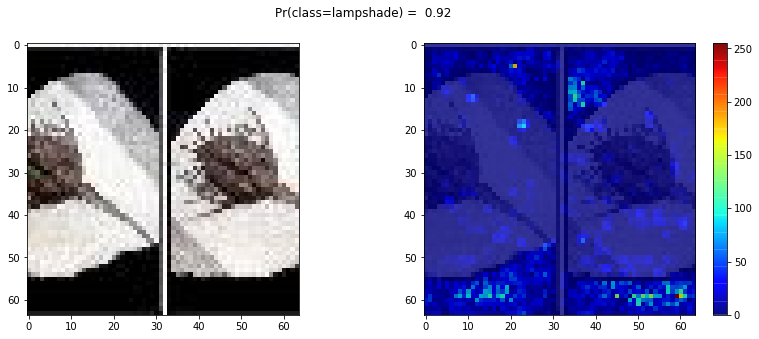

In [17]:
def plot_map(grads):
    fig, axes = plt.subplots(1,2,figsize=(14,5))
    axes[0].imshow(_img)
    axes[1].imshow(_img)
    i = axes[1].imshow(grads,cmap="jet",alpha=0.8)
    fig.colorbar(i)
    plt.suptitle("Pr(class={}) = {:5.2f}".format(
                      classlabels[class_idx],
                      y_pred[0,class_idx]))
plot_map(grad_top1)

In [ ]:
for class_idx in class_idxs_sorted[:topNclass]:
    grad_top1 = visualize_saliency(model,
                               -1,
                               filter_indices = class_idx,
                               seed_input = img)
    plot_map(grad_top1)
    plt.show()